In [5]:
import nengo
import numpy as np
import matplotlib.pyplot as plt
import time

1.3

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

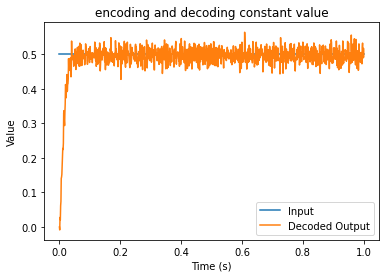

In [42]:
# 1.3.1 - constant value
model = nengo.Network()
with model:
    stim = nengo.Node(output=0.5)
    ens = nengo.Ensemble(50, 1)
    nengo.Connection(stim, ens)
    input_probe = nengo.Probe(stim, synapse=None)
    output_probe = nengo.Probe(ens, synapse=0.01)


with nengo.Simulator(model) as sim:
    sim.run(1)

plt.figure()
plt.plot(sim.trange(), sim.data[input_probe], label='Input')
plt.plot(sim.trange(), sim.data[output_probe], label='Decoded Output')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('encoding and decoding constant value')
plt.legend()
plt.show()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

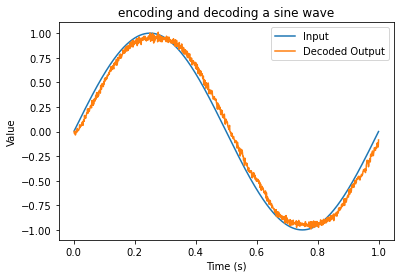

In [43]:
# 1.3.2 - encoding and decoding a sine wave
with model:
    stim = nengo.Node(lambda t: np.sin(2 * np.pi * t))
    ens = nengo.Ensemble(50, 1)
    nengo.Connection(stim, ens)
    input_probe = nengo.Probe(stim, synapse=None)
    output_probe = nengo.Probe(ens, synapse=0.01)

with nengo.Simulator(model) as sim:
    sim.run(1)

plt.figure()
plt.plot(sim.trange(), sim.data[input_probe], label='Input')
plt.plot(sim.trange(), sim.data[output_probe], label='Decoded Output')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('encoding and decoding a sine wave')
plt.legend()
plt.show()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

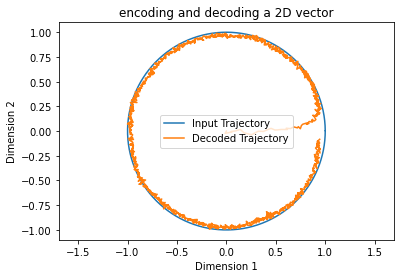

In [44]:
# 1.3.3 - encoding and decoding a 2D vector

with model:
    stim = nengo.Node(lambda t: [np.cos(2 * np.pi * t), np.sin(2 * np.pi * t)])
    ens = nengo.Ensemble(n_neurons=200, dimensions=2)
    nengo.Connection(stim, ens)
    input_probe = nengo.Probe(stim, synapse=None)
    output_probe = nengo.Probe(ens, synapse=0.01)

with nengo.Simulator(model) as sim:
    sim.run(1.0)

plt.figure()
plt.plot(sim.data[input_probe][:, 0], sim.data[input_probe][:, 1], label='Input Trajectory')
plt.plot(sim.data[output_probe][:, 0], sim.data[output_probe][:, 1], label='Decoded Trajectory')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('encoding and decoding a 2D vector')
plt.legend()
plt.axis('equal')
plt.show()

1.4

In [3]:
# 1.4 - comparing the effect of neuron count on representation accuracy and time taken to simulate

def encode_decode(n_neurons):
    with nengo.Network() as model:
        stim = nengo.Node(lambda t: np.sin(2 * np.pi * t))
        ens = nengo.Ensemble(n_neurons, 1)
        nengo.Connection(stim, ens)
        input_probe = nengo.Probe(stim, synapse=None)
        output_probe = nengo.Probe(ens, synapse=0.01)

    with nengo.Simulator(model) as sim:
        sim.run(1)

    plt.figure()
    plt.plot(sim.trange(), sim.data[input_probe], label='Input')
    plt.plot(sim.trange(), sim.data[output_probe], label='Decoded Output')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title(f'encoding and decoding a sine wave with {n_neurons} neurons')
    plt.legend()
    plt.show()


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

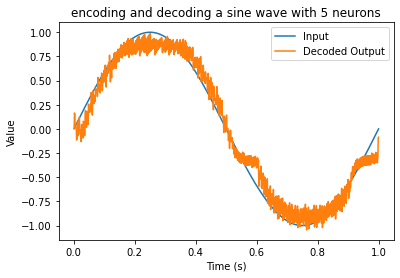

Execution time for 5 neurons: 0.32 seconds


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

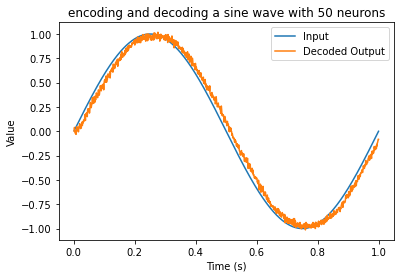

Execution time for 50 neurons: 0.33 seconds


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

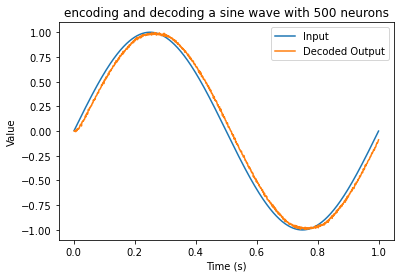

Execution time for 500 neurons: 0.30 seconds


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

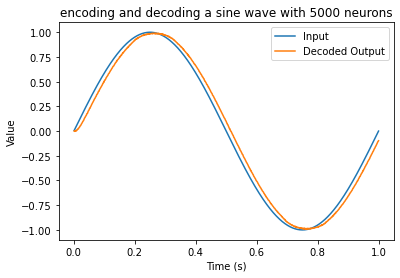

Execution time for 5000 neurons: 3.91 seconds


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

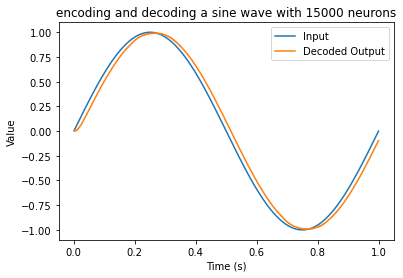

Execution time for 15000 neurons: 67.94 seconds


In [4]:
# Example number of neurons for 5 different ensembles
neuron_counts = [5, 50, 500, 5000, 15000]
execution_times = []

for i, neurons in enumerate(neuron_counts):
    start_time = time.time()
    encode_decode(neuron_counts[i])
    end_time = time.time()
    elapsed_time = end_time - start_time
    execution_times.append(elapsed_time)
    print(f"Execution time for {neurons} neurons: {elapsed_time:.2f} seconds")



2.2

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

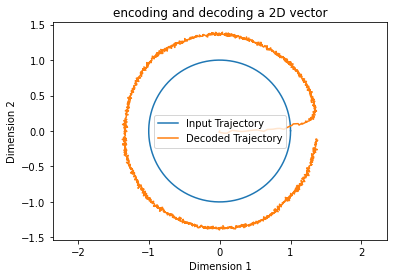

In [11]:
# 2.2.1 Transformation - Scaling

with model:
    stim = nengo.Node(lambda t: [np.cos(2 * np.pi * t), np.sin(2 * np.pi * t)])
    ens = nengo.Ensemble(n_neurons=200, dimensions=2)
    nengo.Connection(stim, ens, function=lambda x: x * 2)
    input_probe = nengo.Probe(stim, synapse=None)
    output_probe = nengo.Probe(ens, synapse=0.01)

with nengo.Simulator(model) as sim:
    sim.run(1.0)

plt.figure()
plt.plot(sim.data[input_probe][:, 0], sim.data[input_probe][:, 1], label='Input Trajectory')
plt.plot(sim.data[output_probe][:, 0], sim.data[output_probe][:, 1], label='Decoded Trajectory')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('encoding and decoding a 2D vector')
plt.legend()
plt.axis('equal')
plt.show()



HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

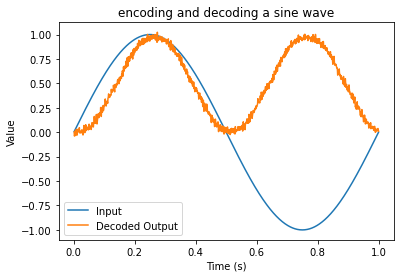

In [13]:
# 2.2.1 Transformation - Square

with model:
    stim = nengo.Node(lambda t: np.sin(2 * np.pi * t))
    ens = nengo.Ensemble(50, 1)
    nengo.Connection(stim, ens, function=lambda x: x**2)
    input_probe = nengo.Probe(stim, synapse=None)
    output_probe = nengo.Probe(ens, synapse=0.01)

with nengo.Simulator(model) as sim:
    sim.run(1)

plt.figure()
plt.plot(sim.trange(), sim.data[input_probe], label='Input')
plt.plot(sim.trange(), sim.data[output_probe], label='Decoded Output')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('encoding and decoding a sine wave')
plt.legend()
plt.show()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

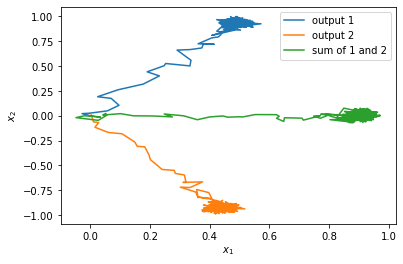

In [25]:
with model:

    stimA = nengo.Node([0.5, 1])
    stimB = nengo.Node([0.5, -1])
    
    ensA = nengo.Ensemble(100, dimensions=2)
    ensB = nengo.Ensemble(100, dimensions=2)
    ensC = nengo.Ensemble(100, dimensions=2)
    
    nengo.Connection(stimA, ensA)
    nengo.Connection(stimB, ensB)
    nengo.Connection(ensA, ensC)
    nengo.Connection(ensB, ensC)
    
    stimA_p = nengo.Probe(stimA)
    stimB_p = nengo.Probe(stimB)
    ensA_p = nengo.Probe(ensA, synapse=0.01)
    ensB_p = nengo.Probe(ensB, synapse=0.01)
    ensC_p = nengo.Probe(ensC, synapse=0.01)
   
sim = nengo.Simulator(model)
sim.run(1)

plt.figure()
plt.plot(sim.data[ensA_p][:,0], sim.data[ensA_p][:,1], label="output 1")
plt.plot(sim.data[ensB_p][:,0], sim.data[ensB_p][:,1], label="output 2")
plt.plot(sim.data[ensC_p][:,0], sim.data[ensC_p][:,1], label="sum of 1 and 2")
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
plt.legend()
plt.show()


3.2

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

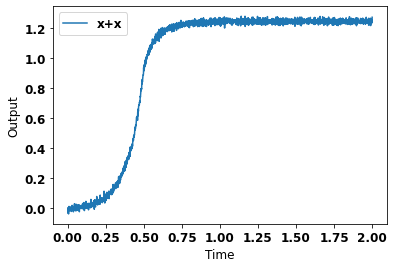

In [51]:
# 3.2 - dynamic system - x(t+1) = x(t) + x(t)

with model:
    ens = nengo.Ensemble(100, dimensions=1)
    
    nengo.Connection(ens, ens, function=lambda x: x+x, synapse = 0.1)

    output_probe = nengo.Probe(ens, synapse=.01)
    
sim = nengo.Simulator(model)
sim.run(2)

plt.plot(sim.trange(), sim.data[output_probe], label="x+x")

plt.legend()
plt.ylabel("Output")
plt.xlabel("Time")
plt.show()


4.1

In [58]:
# 4.1 - Forward Kinematics

theta1_value = np.pi / 6 
theta2_value = np.pi / 4  
theta3_value = np.pi / 3  

with nengo.Network() as model:
    theta1 = nengo.Node(theta1_value)
    theta2 = nengo.Node(theta2_value)
    theta3 = nengo.Node(theta3_value)

    ens_theta1 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    ens_theta2 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    ens_theta3 = nengo.Ensemble(n_neurons=1000, dimensions=1)

    nengo.Connection(theta1, ens_theta1)
    nengo.Connection(theta2, ens_theta2)
    nengo.Connection(theta3, ens_theta3)

    ens_theta12 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    ens_theta123 = nengo.Ensemble(n_neurons=1000, dimensions=1)

    nengo.Connection(ens_theta1, ens_theta12)
    nengo.Connection(ens_theta2, ens_theta12)

    nengo.Connection(ens_theta12, ens_theta123)
    nengo.Connection(ens_theta3, ens_theta123)

    ens_cos1 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    ens_cos12 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    ens_cos123 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    ens_sin1 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    ens_sin12 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    ens_sin123 = nengo.Ensemble(n_neurons=1000, dimensions=1)

    nengo.Connection(ens_theta1, ens_cos1, function=np.cos)
    nengo.Connection(ens_theta12, ens_cos12, function=np.cos)
    nengo.Connection(ens_theta123, ens_cos123, function=np.cos)

    nengo.Connection(ens_theta1, ens_sin1, function=np.sin)
    nengo.Connection(ens_theta12, ens_sin12, function=np.sin)
    nengo.Connection(ens_theta123, ens_sin123, function=np.sin)

    ens_x = nengo.Ensemble(n_neurons=1000, dimensions=1)
    ens_y = nengo.Ensemble(n_neurons=1000, dimensions=1)

    nengo.Connection(ens_cos1, ens_x)
    nengo.Connection(ens_cos12, ens_x)
    nengo.Connection(ens_cos123, ens_x)

    nengo.Connection(ens_sin1, ens_y)
    nengo.Connection(ens_sin12, ens_y)
    nengo.Connection(ens_sin123, ens_y)

    x_probe = nengo.Probe(ens_x, synapse=0.01)
    y_probe = nengo.Probe(ens_y, synapse=0.01)

with nengo.Simulator(model) as sim:
    sim.run(1)

x_value = sim.data[x_probe][-1]
y_value = sim.data[y_probe][-1]

print(f'new x: {x_value[0]:.3f}')
print(f'new y: {y_value[0]:.3f}')

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

new x: 1.226
new y: 1.286


In [57]:
testX = np.cos(np.pi/6) + np.cos(np.pi/6 + np.pi/4) + np.cos(np.pi/6 + np.pi/4 + np.pi/3)
testY = np.sin(np.pi/6) + np.sin(np.pi/6 + np.pi/4) + np.sin(np.pi/6 + np.pi/4 + np.pi/3)

print(testX)
print(testY)

0.4177376677004121
2.1730326074756157


In [ ]:
# part 1
import nengo
import numpy as np
import matplotlib.pyplot as plt

# Create a Nengo model
model = nengo.Network()
with model:
    # Input node providing a sine wave
    input_node = nengo.Node(lambda t: np.sin(2 * np.pi * t))
    # Ensemble of 100 neurons representing the input
    ens = nengo.Ensemble(n_neurons=100, dimensions=1)
    # Connect the input node to the ensemble
    nengo.Connection(input_node, ens)
    # Probes to record data
    probe_input = nengo.Probe(input_node)
    probe_output = nengo.Probe(ens, synapse=0.01)

# Run the simulation
with nengo.Simulator(model) as sim:
    sim.run(1.0)

# Plot the results
plt.figure()
plt.plot(sim.trange(), sim.data[probe_input], label="Input Signal")
plt.plot(sim.trange(), sim.data[probe_output], label="Decoded Output")
plt.title("Encoding and Decoding a Scalar Value")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.legend()
plt.savefig("images/part1/ex1.png")


import nengo
import numpy as np
import matplotlib.pyplot as plt

# Create a Nengo model
model = nengo.Network()
with model:
    # Input node providing a 2D signal
    input_node = nengo.Node(lambda t: [np.sin(2 * np.pi * t), np.cos(2 * np.pi * t)])
    # Ensemble representing a 2D vector
    ens = nengo.Ensemble(n_neurons=200, dimensions=2)
    # Connect the input node to the ensemble
    nengo.Connection(input_node, ens)
    # Node to receive the decoded product
    product_node = nengo.Node(size_in=1)
    # Connection decoding the product of the two inputs
    nengo.Connection(ens, product_node, function=lambda x: x[0] * x[1])
    # Probes to record data
    probe_product = nengo.Probe(product_node, synapse=0.01)

# Run the simulation
with nengo.Simulator(model) as sim:
    sim.run(1.0)

# Plot the results
plt.figure()
plt.plot(sim.trange(), sim.data[probe_product], label="Decoded Product")
plt.title("Decoding a Nonlinear Function of a 2D Input")
plt.xlabel("Time (s)")
plt.ylabel("Product Value")
plt.legend()
plt.savefig("images/part1/ex2.png")

import nengo
import numpy as np
import matplotlib.pyplot as plt

# Create a Nengo model
model = nengo.Network()
with model:
    # Input node providing a sine wave
    input_node = nengo.Node(lambda t: np.sin(2 * np.pi * t))
    # Ensemble with LIF neurons
    ens = nengo.Ensemble(n_neurons=100, dimensions=1, neuron_type=nengo.LIF())
    # Connect the input node to the ensemble
    nengo.Connection(input_node, ens)
    # Output node to receive the decoded signal
    output_node = nengo.Node(size_in=1)
    # Connect the ensemble to the output node
    nengo.Connection(ens, output_node, synapse=0.1)
    # Probes to record data
    probe_output = nengo.Probe(output_node, synapse=0.01)

# Run the simulation
with nengo.Simulator(model) as sim:
    sim.run(1.0)

# Plot the results
plt.figure()
plt.plot(sim.trange(), sim.data[probe_output], label="Decoded Output")
plt.title("Encoding and Decoding with LIF Neurons")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.legend()
plt.savefig("images/part1/ex3.png")

import nengo
import numpy as np
import matplotlib.pyplot as plt

# Create a Nengo model with 10 neurons
model = nengo.Network()
with model:
    input_node = nengo.Node(lambda t: np.sin(2 * np.pi * t))
    ens = nengo.Ensemble(n_neurons=10, dimensions=1)
    nengo.Connection(input_node, ens)
    probe_input = nengo.Probe(input_node)
    probe_output = nengo.Probe(ens, synapse=0.01)

# Run the simulation
with nengo.Simulator(model) as sim:
    sim.run(1.0)

# Plot the results
plt.figure()
plt.plot(sim.trange(), sim.data[probe_input], label="Input Signal")
plt.plot(sim.trange(), sim.data[probe_output], label="Decoded Output with 10 Neurons")
plt.title("Representation with 10 Neurons")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.legend()
plt.savefig("images/part1/ex4-1.png")

# Update the number of neurons to 100
model = nengo.Network()
with model:
    input_node = nengo.Node(lambda t: np.sin(2 * np.pi * t))
    ens = nengo.Ensemble(n_neurons=100, dimensions=1)
    nengo.Connection(input_node, ens)
    probe_input = nengo.Probe(input_node)
    probe_output = nengo.Probe(ens, synapse=0.01)
# Run the simulation
with nengo.Simulator(model) as sim:
    sim.run(1.0)
# Plot the results
plt.figure()
plt.plot(sim.trange(), sim.data[probe_input], label="Input Signal")
plt.plot(sim.trange(), sim.data[probe_output], label="Decoded Output with 100 Neurons")
plt.title("Representation with 100 Neurons")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.legend()
plt.savefig("images/part1/ex4-2.png")

# Update the number of neurons to 10,000
model = nengo.Network()
with model:
    input_node = nengo.Node(lambda t: np.sin(2 * np.pi * t))
    ens = nengo.Ensemble(n_neurons=10000, dimensions=1)
    nengo.Connection(input_node, ens)
    probe_input = nengo.Probe(input_node)
    probe_output = nengo.Probe(ens, synapse=0.01)
# Run the simulation (Note: This may be computationally intensive)
with nengo.Simulator(model) as sim:
    sim.run(1.0)
# Plot the results
plt.figure()
plt.plot(sim.trange(), sim.data[probe_input], label="Input Signal")
plt.plot(
    sim.trange(), sim.data[probe_output], label="Decoded Output with 10,000 Neurons"
)
plt.title("Representation with 10,000 Neurons")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.legend()
plt.savefig("images/part1/ex4-3.png")



In [ ]:
# part 2
import nengo
import numpy as np
import matplotlib.pyplot as plt

# Create a Nengo model
model = nengo.Network(label="Linear Transformation")
with model:
    # Input node providing a sine wave
    input_node = nengo.Node(lambda t: np.sin(2 * np.pi * t))
    # Ensemble representing the input signal
    input_ens = nengo.Ensemble(n_neurons=100, dimensions=1)
    # Ensemble representing the scaled output
    output_ens = nengo.Ensemble(n_neurons=100, dimensions=1)
    # Connect the input node to the input ensemble
    nengo.Connection(input_node, input_ens)
    # Apply a linear transformation (scale by 2)
    nengo.Connection(input_ens, output_ens, function=lambda x: 2 * x)
    # Probes to record data
    probe_input = nengo.Probe(input_node, synapse=0.01)
    probe_output = nengo.Probe(output_ens, synapse=0.01)
# Run the simulation
with nengo.Simulator(model) as sim:
    sim.run(1.0)
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(sim.trange(), sim.data[probe_input], label="Input Signal")
plt.plot(sim.trange(), sim.data[probe_output], label="Scaled Output (x2)")
plt.title("Linear Transformation: Scaling a Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.savefig("images/part2/ex1.png")

import nengo
import numpy as np
import matplotlib.pyplot as plt

# Create a Nengo model
model = nengo.Network(label="Nonlinear Transformation")
with model:
    # Input node providing a sine wave
    input_node = nengo.Node(lambda t: np.sin(2 * np.pi * t))
    # Ensemble representing the input signal
    input_ens = nengo.Ensemble(n_neurons=100, dimensions=1)
    # Ensemble representing the squared output
    output_ens = nengo.Ensemble(n_neurons=100, dimensions=1)
    # Connect the input node to the input ensemble
    nengo.Connection(input_node, input_ens)
    # Apply a nonlinear transformation (square the input)
    nengo.Connection(input_ens, output_ens, function=lambda x: x**2)
    # Probes to record data
    probe_input = nengo.Probe(input_node, synapse=None)
    probe_output = nengo.Probe(output_ens, synapse=0.01)

# Run the simulation
with nengo.Simulator(model) as sim:
    sim.run(1.0)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(sim.trange(), sim.data[probe_input], label="Input Signal")
plt.plot(sim.trange(), sim.data[probe_output], label="Squared Output")
plt.title("Nonlinear Transformation: Squaring a Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.savefig("images/part2/ex2.png")

import nengo
import numpy as np
import matplotlib.pyplot as plt

# Create a Nengo model
model = nengo.Network(label="Vector Transformation")
with model:
    # Input nodes providing two signals
    input_node1 = nengo.Node(lambda t: np.sin(2 * np.pi * t))
    input_node2 = nengo.Node(lambda t: np.cos(2 * np.pi * t))
    # Ensemble representing both input signals (2D)
    input_ens = nengo.Ensemble(n_neurons=200, dimensions=2)
    # Connect the input nodes to the ensemble
    nengo.Connection(input_node1, input_ens[0])
    nengo.Connection(input_node2, input_ens[1])
    # Ensemble representing the product output
    output_ens = nengo.Ensemble(n_neurons=100, dimensions=1)
    # Apply the transformation (compute the product of inputs)
    nengo.Connection(input_ens, output_ens, function=lambda x: x[0] * x[1])
    # Probes to record data
    probe_input1 = nengo.Probe(input_node1, synapse=None)
    probe_input2 = nengo.Probe(input_node2, synapse=None)
    probe_output = nengo.Probe(output_ens, synapse=0.01)

# Run the simulation
with nengo.Simulator(model) as sim:
    sim.run(1.0)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(sim.trange(), sim.data[probe_input1], label="Input Signal 1 (sin)")
plt.plot(sim.trange(), sim.data[probe_input2], label="Input Signal 2 (cos)")
plt.plot(sim.trange(), sim.data[probe_output], label="Product Output")
plt.title("Vector Transformation: Multiplying Two Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.savefig("images/part2/ex3.png")

In [ ]:
# part 3

import nengo
import numpy as np
import matplotlib.pyplot as plt

# Create a Nengo model
model = nengo.Network(label="Neural Integrator")
with model:
    # Input node: provides a constant input of 1.0 for the first 0.5 seconds
    def input_function(t):
        return 1.0 if t < 0.5 else 0.0

    input_node = nengo.Node(input_function)
    # Ensemble representing the integrator state (1-dimensional)
    integrator = nengo.Ensemble(
        n_neurons=200,
        dimensions=1,
        neuron_type=nengo.LIF(),
        max_rates=nengo.dists.Uniform(100, 200),  # Firing rates between 100 and 200 Hz
        intercepts=nengo.dists.Uniform(-0.5, 0.5),  # Intercepts between -0.5 and 0.5
    )
    # Define the recurrent connection (feedback) to implement integration
    tau = 0.1  # Time constant for the integrator
    nengo.Connection(
        integrator,
        integrator,
        synapse=tau,
        transform=1.0,  # Identity transform for feedback
    )
    # Connect the input to the integrator with appropriate scaling
    nengo.Connection(
        input_node, integrator, synapse=None, transform=tau  # Scale input by tau
    )
    # Probes to record data
    probe_input = nengo.Probe(input_node, synapse=None)
    probe_integrator = nengo.Probe(integrator, synapse=0.01)

# Run the simulation
with nengo.Simulator(model) as sim:
    sim.run(1.0)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(sim.trange(), sim.data[probe_input], label="Input Signal")
plt.plot(sim.trange(), sim.data[probe_integrator], label="Integrator Output")
plt.title("Neural Integrator Example")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.savefig("images/part3/ex1.png")

In [ ]:
# part 4

import nengo
import numpy as np
import matplotlib.pyplot as plt

model = nengo.Network(label="Forward Kinematics")
with model:
    # Define time-varying joint angles (for demonstration)
    theta1_node = nengo.Node(lambda t: np.sin(t))
    theta2_node = nengo.Node(lambda t: np.cos(t))
    theta3_node = nengo.Node(lambda t: np.sin(2 * t))

    # Ensembles representing each joint angle
    theta1 = nengo.Ensemble(n_neurons=100, dimensions=1, label="Theta1")
    theta2 = nengo.Ensemble(n_neurons=100, dimensions=1, label="Theta2")
    theta3 = nengo.Ensemble(n_neurons=100, dimensions=1, label="Theta3")

    # Connect input nodes to ensembles
    nengo.Connection(theta1_node, theta1)
    nengo.Connection(theta2_node, theta2)
    nengo.Connection(theta3_node, theta3)

    # Compute sums of angles
    sum12 = nengo.Ensemble(n_neurons=200, dimensions=1, label="Theta1 + Theta2")
    nengo.Connection(theta1, sum12)
    nengo.Connection(theta2, sum12)

    sum123 = nengo.Ensemble(
        n_neurons=200, dimensions=1, label="Theta1 + Theta2 + Theta3"
    )
    nengo.Connection(sum12, sum123)
    nengo.Connection(theta3, sum123)

    # Compute cosines
    cos_theta1 = nengo.Ensemble(n_neurons=200, dimensions=1, label="cos(Theta1)")
    nengo.Connection(theta1, cos_theta1, function=lambda x: np.cos(x))

    cos_sum12 = nengo.Ensemble(
        n_neurons=200, dimensions=1, label="cos(Theta1 + Theta2)"
    )
    nengo.Connection(sum12, cos_sum12, function=lambda x: np.cos(x))

    cos_sum123 = nengo.Ensemble(
        n_neurons=200, dimensions=1, label="cos(Theta1 + Theta2 + Theta3)"
    )
    nengo.Connection(sum123, cos_sum123, function=lambda x: np.cos(x))

    # Compute sines
    sin_theta1 = nengo.Ensemble(n_neurons=200, dimensions=1, label="sin(Theta1)")
    nengo.Connection(theta1, sin_theta1, function=lambda x: np.sin(x))

    sin_sum12 = nengo.Ensemble(
        n_neurons=200, dimensions=1, label="sin(Theta1 + Theta2)"
    )
    nengo.Connection(sum12, sin_sum12, function=lambda x: np.sin(x))

    sin_sum123 = nengo.Ensemble(
        n_neurons=200, dimensions=1, label="sin(Theta1 + Theta2 + Theta3)"
    )
    nengo.Connection(sum123, sin_sum123, function=lambda x: np.sin(x))

    # Compute x and y coordinates
    x_coord = nengo.Ensemble(n_neurons=200, dimensions=1, label="x")
    nengo.Connection(cos_theta1, x_coord)
    nengo.Connection(cos_sum12, x_coord)
    nengo.Connection(cos_sum123, x_coord)

    y_coord = nengo.Ensemble(n_neurons=200, dimensions=1, label="y")
    nengo.Connection(sin_theta1, y_coord)
    nengo.Connection(sin_sum12, y_coord)
    nengo.Connection(sin_sum123, y_coord)

    # Probes for joint angles
    probe_theta1 = nengo.Probe(theta1, synapse=0.01)
    probe_theta2 = nengo.Probe(theta2, synapse=0.01)
    probe_theta3 = nengo.Probe(theta3, synapse=0.01)

    # Probes for x and y coordinates
    probe_x = nengo.Probe(x_coord, synapse=0.01)
    probe_y = nengo.Probe(y_coord, synapse=0.01)

# Create the simulator and run the model
with nengo.Simulator(model) as sim:
    sim.run(5.0)  # Run for 5 seconds

# Extract data
t = sim.trange()
theta1_data = sim.data[probe_theta1]
theta2_data = sim.data[probe_theta2]
theta3_data = sim.data[probe_theta3]
x_data = sim.data[probe_x]
y_data = sim.data[probe_y]

# Plot joint angles
plt.figure(figsize=(12, 4))
plt.plot(t, theta1_data, label="Theta1")
plt.plot(t, theta2_data, label="Theta2")
plt.plot(t, theta3_data, label="Theta3")
plt.title("Joint Angles Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.legend()
plt.grid(True)
plt.savefig("images/part4/joint_angles.png")

# Plot x and y coordinates
plt.figure(figsize=(12, 4))
plt.plot(t, x_data, label="x")
plt.plot(t, y_data, label="y")
plt.title("End Effector Coordinates Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Coordinate Value")
plt.legend()
plt.grid(True)
plt.savefig("images/part4/end_effector_coordinates.png")

# Plot x vs y to visualize the trajectory
plt.figure(figsize=(6, 6))
plt.plot(x_data, y_data)
plt.title("End Effector Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis("equal")
plt.savefig("images/part4/end_effector_trajectory.png")